## Predicting the sale-prices of bulldozers using Machine-learning 

In this notebook,were going to go through an example of a machine learning project with the goal of predicting the sales of bulldozers 

## 1.Problem
> How best can we predict the future sale prices of bulldozers,given its characteristics and similar examples of how much future bulldozers have been sold

## 2.Data

The data has been downloaded from the kaggle Bluebook for Bulldozers competition
* https://www.kaggle.com/c/bluebook-for-bulldozers/data

There are three main datasets:

* Train.csv->it is the taining set which contains the data through the end of 2011
* Valid.csv->it is the validation_Set..It contains the data from the beggining of January 2012 to April-30-2012.You make predictions on this set throughout the majority of the competition.Your score on this set is used to place you in the public leaderboard
* Test.csv->It is the test set and this dataset willl not be released until the last week of the competition.It contains the data from May-1-2012 until November the same year.Your score on the test set will be used for the final ranking of the competition 

## 3.Evaluation

The evaluation metric for this competition is the RMSLE(root mean squared log error) between the actual and the predicted action prices 

* https://www.kaggle.com/c/bluebook-for-bulldozers/overview/evaluation

**NOTE:** The goal for most of the regression evaluation metrics is to minimize the error.For example the goal for this project will be to minimize the Root mean squared log error

## 4.Features

Kaggle provides a data dictionary which  contains all the descriptions of the features of the dataset

In [176]:
#Standard imports for our notebook
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import sklearn


In [177]:
#import training and validation sets 
df=pd.read_csv("TrainAndValid.csv",
              low_memory=False)
df.head()


,SalesID,SalePrice,MachineID,ModelID,datasource,auctioneerID,YearMade,MachineHoursCurrentMeter,UsageBand,saledate,...,Undercarriage_Pad_Width,Stick_Length,Thumb,Pattern_Changer,Grouser_Type,Backhoe_Mounting,Blade_Type,Travel_Controls,Differential_Type,Steering_Controls
0,1139246,66000.0,999089,3157,121,3.0,2004,68.0,Low,11/16/2006 0:00,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,Standard,Conventional
1,1139248,57000.0,117657,77,121,3.0,1996,4640.0,Low,3/26/2004 0:00,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,Standard,Conventional
2,1139249,10000.0,434808,7009,121,3.0,2001,2838.0,High,2/26/2004 0:00,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
3,1139251,38500.0,1026470,332,121,3.0,2001,3486.0,High,5/19/2011 0:00,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
4,1139253,11000.0,1057373,17311,121,3.0,2007,722.0,Medium,7/23/2009 0:00,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN


In [178]:
#check the dataset description
df.describe()

,SalesID,SalePrice,MachineID,ModelID,datasource,auctioneerID,YearMade,MachineHoursCurrentMeter
count,4.126980e+05,412698.000000,4.126980e+05,412698.000000,412698.000000,392562.000000,412698.000000,1.475040e+05
mean,2.011161e+06,31215.181414,1.230061e+06,6947.201828,135.169361,6.585268,1899.049637,3.522988e+03
std,1.080068e+06,23141.743695,4.539533e+05,6280.824982,9.646749,17.158409,292.190243,2.716993e+04
min,1.139246e+06,4750.000000,0.000000e+00,28.000000,121.000000,0.000000,1000.000000,0.000000e+00
25%,1.421898e+06,14500.000000,1.088593e+06,3261.000000,132.000000,1.000000,1985.000000,0.000000e+00
50%,1.645852e+06,24000.000000,1.284397e+06,4605.000000,132.000000,2.000000,1995.000000,0.000000e+00
75%,2.261012e+06,40000.000000,1.478079e+06,8899.000000,136.000000,4.000000,2001.000000,3.209000e+03
max,6.333349e+06,142000.000000,2.486330e+06,37198.000000,173.000000,99.000000,2014.000000,2.483300e+06


In [179]:
#check the dataset information
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 412698 entries, 0 to 412697
Data columns (total 53 columns):
 #   Column                    Non-Null Count   Dtype  
---  ------                    --------------   -----  
 0   SalesID                   412698 non-null  int64  
 1   SalePrice                 412698 non-null  float64
 2   MachineID                 412698 non-null  int64  
 3   ModelID                   412698 non-null  int64  
 4   datasource                412698 non-null  int64  
 5   auctioneerID              392562 non-null  float64
 6   YearMade                  412698 non-null  int64  
 7   MachineHoursCurrentMeter  147504 non-null  float64
 8   UsageBand                 73670 non-null   object 
 9   saledate                  412698 non-null  object 
 10  fiModelDesc               412698 non-null  object 
 11  fiBaseModel               412698 non-null  object 
 12  fiSecondaryDesc           271971 non-null  object 
 13  fiModelSeries             58667 non-null   o

In [180]:
#check the null values in the dataset
df.isna().sum()

SalesID                          0
SalePrice                        0
MachineID                        0
ModelID                          0
datasource                       0
auctioneerID                 20136
YearMade                         0
MachineHoursCurrentMeter    265194
UsageBand                   339028
saledate                         0
fiModelDesc                      0
fiBaseModel                      0
fiSecondaryDesc             140727
fiModelSeries               354031
fiModelDescriptor           337882
ProductSize                 216605
fiProductClassDesc               0
state                            0
ProductGroup                     0
ProductGroupDesc                 0
Drive_System                305611
Enclosure                      334
Forks                       214983
Pad_Type                    331602
Ride_Control                259970
Stick                       331602
Transmission                224691
Turbocharged                331602
Blade_Extension     

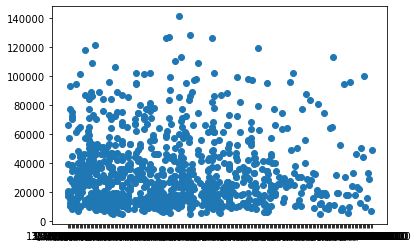

In [181]:
#plot the sales date and the sale_price
fig,ax=plt.subplots()
ax.scatter(df["saledate"][:1000],df["SalePrice"][:1000])

<AxesSubplot:ylabel='Frequency'>

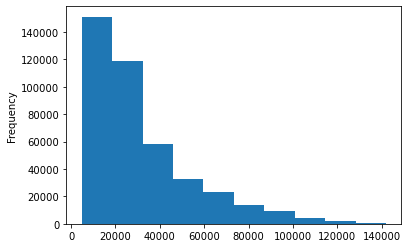

In [182]:
#check the distribution of the Saleprice column
df.SalePrice.plot.hist()

### Parsing dates 
When we work with time series data we want to enrich our date and time component as much as possible

We can do that be telling pandas which of our columns has the dates in it using the `parse_dates` parameter 



In [183]:
#import the dataframe again but this time pass the parse_dates parameter
df=pd.read_csv("TrainAndValid.csv",
              low_memory=False,
              parse_dates=["saledate"])
df.head()


,SalesID,SalePrice,MachineID,ModelID,datasource,auctioneerID,YearMade,MachineHoursCurrentMeter,UsageBand,saledate,...,Undercarriage_Pad_Width,Stick_Length,Thumb,Pattern_Changer,Grouser_Type,Backhoe_Mounting,Blade_Type,Travel_Controls,Differential_Type,Steering_Controls
0,1139246,66000.0,999089,3157,121,3.0,2004,68.0,Low,2006-11-16,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,Standard,Conventional
1,1139248,57000.0,117657,77,121,3.0,1996,4640.0,Low,2004-03-26,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,Standard,Conventional
2,1139249,10000.0,434808,7009,121,3.0,2001,2838.0,High,2004-02-26,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
3,1139251,38500.0,1026470,332,121,3.0,2001,3486.0,High,2011-05-19,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
4,1139253,11000.0,1057373,17311,121,3.0,2007,722.0,Medium,2009-07-23,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN


In [184]:
#check the datattype of the dates column
df["saledate"].dtype

dtype('<M8[ns]')

In [185]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 412698 entries, 0 to 412697
Data columns (total 53 columns):
 #   Column                    Non-Null Count   Dtype         
---  ------                    --------------   -----         
 0   SalesID                   412698 non-null  int64         
 1   SalePrice                 412698 non-null  float64       
 2   MachineID                 412698 non-null  int64         
 3   ModelID                   412698 non-null  int64         
 4   datasource                412698 non-null  int64         
 5   auctioneerID              392562 non-null  float64       
 6   YearMade                  412698 non-null  int64         
 7   MachineHoursCurrentMeter  147504 non-null  float64       
 8   UsageBand                 73670 non-null   object        
 9   saledate                  412698 non-null  datetime64[ns]
 10  fiModelDesc               412698 non-null  object        
 11  fiBaseModel               412698 non-null  object        
 12  fi

In [186]:
df.saledate

0        2006-11-16
1        2004-03-26
2        2004-02-26
3        2011-05-19
4        2009-07-23
            ...    
412693   2012-03-07
412694   2012-01-28
412695   2012-01-28
412696   2012-03-07
412697   2012-01-28
Name: saledate, Length: 412698, dtype: datetime64[ns]

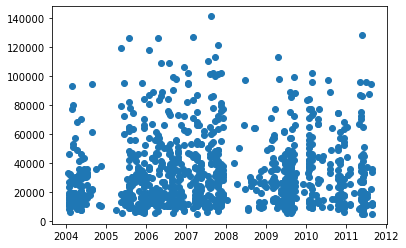

In [187]:
#plot the sales date and the Saleprice column
fig,ax=plt.subplots()
ax.scatter(df["saledate"][:1000],df["SalePrice"][:1000]);

In [188]:
df.head()

,SalesID,SalePrice,MachineID,ModelID,datasource,auctioneerID,YearMade,MachineHoursCurrentMeter,UsageBand,saledate,...,Undercarriage_Pad_Width,Stick_Length,Thumb,Pattern_Changer,Grouser_Type,Backhoe_Mounting,Blade_Type,Travel_Controls,Differential_Type,Steering_Controls
0,1139246,66000.0,999089,3157,121,3.0,2004,68.0,Low,2006-11-16,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,Standard,Conventional
1,1139248,57000.0,117657,77,121,3.0,1996,4640.0,Low,2004-03-26,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,Standard,Conventional
2,1139249,10000.0,434808,7009,121,3.0,2001,2838.0,High,2004-02-26,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
3,1139251,38500.0,1026470,332,121,3.0,2001,3486.0,High,2011-05-19,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
4,1139253,11000.0,1057373,17311,121,3.0,2007,722.0,Medium,2009-07-23,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN


In [189]:
#check the columns 
df.head().T

,0,1,2,3,4
SalesID,1139246,1139248,1139249,1139251,1139253
SalePrice,66000.0,57000.0,10000.0,38500.0,11000.0
MachineID,999089,117657,434808,1026470,1057373
ModelID,3157,77,7009,332,17311
datasource,121,121,121,121,121
auctioneerID,3.0,3.0,3.0,3.0,3.0
YearMade,2004,1996,2001,2001,2007
MachineHoursCurrentMeter,68.0,4640.0,2838.0,3486.0,722.0
UsageBand,Low,Low,High,High,Medium
saledate,2006-11-16 00:00:00,2004-03-26 00:00:00,2004-02-26 00:00:00,2011-05-19 00:00:00,2009-07-23 00:00:00


In [190]:
#check the sales date column
df.saledate.head(20)

0    2006-11-16
1    2004-03-26
2    2004-02-26
3    2011-05-19
4    2009-07-23
5    2008-12-18
6    2004-08-26
7    2005-11-17
8    2009-08-27
9    2007-08-09
10   2008-08-21
11   2006-08-24
12   2005-10-20
13   2006-01-26
14   2006-01-03
15   2006-11-16
16   2007-06-14
17   2010-01-28
18   2006-03-09
19   2005-11-17
Name: saledate, dtype: datetime64[ns]

### Sort the DataFrame using the saledate column
When working with time series data,its always a good idea to sort the dataframe using the dates column

In [191]:
#Sort the dataframe using the dates column
df.sort_values(by=["saledate"],inplace=True,ascending=True)
df.saledate.head(20)

205615   1989-01-17
274835   1989-01-31
141296   1989-01-31
212552   1989-01-31
62755    1989-01-31
54653    1989-01-31
81383    1989-01-31
204924   1989-01-31
135376   1989-01-31
113390   1989-01-31
113394   1989-01-31
116419   1989-01-31
32138    1989-01-31
127610   1989-01-31
76171    1989-01-31
127000   1989-01-31
128130   1989-01-31
127626   1989-01-31
55455    1989-01-31
55454    1989-01-31
Name: saledate, dtype: datetime64[ns]

###  Make a copy of the original dataframe
we make a copy of the original dataframe so that even when we manipulate the temporary copy we willstill have the original dataframe 

In [192]:
#make a copy of the original dataframe 
df_tmp=df.copy()

In [193]:
#check the copy 
df_tmp.saledate

205615   1989-01-17
274835   1989-01-31
141296   1989-01-31
212552   1989-01-31
62755    1989-01-31
            ...    
410879   2012-04-28
412476   2012-04-28
411927   2012-04-28
407124   2012-04-28
409203   2012-04-28
Name: saledate, Length: 412698, dtype: datetime64[ns]

In [194]:
df_tmp.head().T

,205615,274835,141296,212552,62755
SalesID,1646770,1821514,1505138,1671174,1329056
SalePrice,9500.0,14000.0,50000.0,16000.0,22000.0
MachineID,1126363,1194089,1473654,1327630,1336053
ModelID,8434,10150,4139,8591,4089
datasource,132,132,132,132,132
auctioneerID,18.0,99.0,99.0,99.0,99.0
YearMade,1974,1980,1978,1980,1984
MachineHoursCurrentMeter,NaN,NaN,NaN,NaN,NaN
UsageBand,NaN,NaN,NaN,NaN,NaN
saledate,1989-01-17 00:00:00,1989-01-31 00:00:00,1989-01-31 00:00:00,1989-01-31 00:00:00,1989-01-31 00:00:00


###  Add datetime parameters to the saledate column


In [195]:
df_tmp["saleYear"]=df_tmp.saledate.dt.year
df_tmp["saleMonth"]=df_tmp.saledate.dt.month
df_tmp["saleDay"]=df_tmp.saledate.dt.day
df_tmp["saleDayOfWeek"]=df_tmp.saledate.dt.dayofweek
df_tmp["saleDayOfYear"]=df_tmp.saledate.dt.dayofyear

In [196]:
#check the formatted dataframe
df_tmp.head().T

,205615,274835,141296,212552,62755
SalesID,1646770,1821514,1505138,1671174,1329056
SalePrice,9500.0,14000.0,50000.0,16000.0,22000.0
MachineID,1126363,1194089,1473654,1327630,1336053
ModelID,8434,10150,4139,8591,4089
datasource,132,132,132,132,132
auctioneerID,18.0,99.0,99.0,99.0,99.0
YearMade,1974,1980,1978,1980,1984
MachineHoursCurrentMeter,NaN,NaN,NaN,NaN,NaN
UsageBand,NaN,NaN,NaN,NaN,NaN
saledate,1989-01-17 00:00:00,1989-01-31 00:00:00,1989-01-31 00:00:00,1989-01-31 00:00:00,1989-01-31 00:00:00


In [197]:
#check the shape of the formatted dataframe
df_tmp.shape

(412698, 58)

####  Since we can see that our engineered features have beeen enriched into the dataframe,we can now start our exploratory data analysis ...Lets remove the saledate column


In [198]:
#Remove the saledate column
df_tmp.drop("saledate",axis=1,inplace=True)


In [199]:
df_tmp.shape

(412698, 57)

In [200]:
#check the values of the diffeernt columns
df.state.value_counts()

Florida           67320
Texas             53110
California        29761
Washington        16222
Georgia           14633
Maryland          13322
Mississippi       13240
Ohio              12369
Illinois          11540
Colorado          11529
New Jersey        11156
North Carolina    10636
Tennessee         10298
Alabama           10292
Pennsylvania      10234
South Carolina     9951
Arizona            9364
New York           8639
Connecticut        8276
Minnesota          7885
Missouri           7178
Nevada             6932
Louisiana          6627
Kentucky           5351
Maine              5096
Indiana            4124
Arkansas           3933
New Mexico         3631
Utah               3046
Unspecified        2801
Wisconsin          2745
New Hampshire      2738
Virginia           2353
Idaho              2025
Oregon             1911
Michigan           1831
Wyoming            1672
Montana            1336
Iowa               1336
Oklahoma           1326
Nebraska            866
West Virginia   

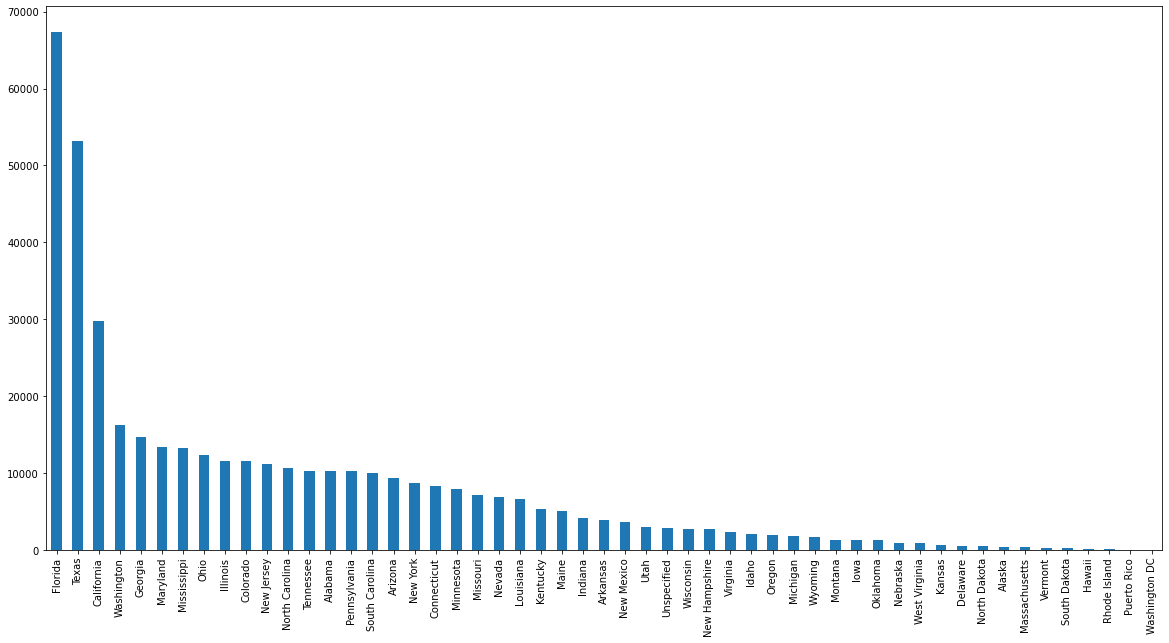

In [201]:
#check the distribution of the states columns
import matplotlib.pyplot as plt
df.state.value_counts().plot(kind="bar",figsize=(20,10));

##  Modelling 
We have done enough EDA(Exploratory data analysis)  we could always do more but lets now start to do model driven EDA 

Before we build any model, we need to ensure that there are no missing values in our data,We have to ensure that all of our data is numerical and also convert the strings columns into categorical

## Convertig the strings into categories 
one way we can convert all the strings columns into numbers is by converting them into categorical dtypes

In [202]:
# Check if the UsageBand column is of string dtype
pd.api.types.is_string_dtype(df_tmp["UsageBand"])

True

In [203]:
#find the columns which contain the string values
for label,content in df_tmp.items():
    if pd.api.types.is_string_dtype(content):
        print(label)

UsageBand
fiModelDesc
fiBaseModel
fiSecondaryDesc
fiModelSeries
fiModelDescriptor
ProductSize
fiProductClassDesc
state
ProductGroup
ProductGroupDesc
Drive_System
Enclosure
Forks
Pad_Type
Ride_Control
Stick
Transmission
Turbocharged
Blade_Extension
Blade_Width
Enclosure_Type
Engine_Horsepower
Hydraulics
Pushblock
Ripper
Scarifier
Tip_Control
Tire_Size
Coupler
Coupler_System
Grouser_Tracks
Hydraulics_Flow
Track_Type
Undercarriage_Pad_Width
Stick_Length
Thumb
Pattern_Changer
Grouser_Type
Backhoe_Mounting
Blade_Type
Travel_Controls
Differential_Type
Steering_Controls


In [204]:
#if youre wondering what df_tmp.items()means,herre is an example
random_dict={"key_1":"hello",
            "key_2":"world"}

#iterate through the dictionary and display the key value pairs 
for key,value in random_dict.items():
    print(f"This is a key:{key}",
         f"This is a value:{value}")

This is a key:key_1 This is a value:hello
This is a key:key_2 This is a value:world


In [205]:
#This will turn our string valus into categorical values 

for label,content in df_tmp.items():
    if pd.api.types.is_string_dtype(content):
        df_tmp[label]=content.astype("category").cat.as_ordered()
        


In [206]:
df_tmp.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 412698 entries, 205615 to 409203
Data columns (total 57 columns):
 #   Column                    Non-Null Count   Dtype   
---  ------                    --------------   -----   
 0   SalesID                   412698 non-null  int64   
 1   SalePrice                 412698 non-null  float64 
 2   MachineID                 412698 non-null  int64   
 3   ModelID                   412698 non-null  int64   
 4   datasource                412698 non-null  int64   
 5   auctioneerID              392562 non-null  float64 
 6   YearMade                  412698 non-null  int64   
 7   MachineHoursCurrentMeter  147504 non-null  float64 
 8   UsageBand                 73670 non-null   category
 9   fiModelDesc               412698 non-null  category
 10  fiBaseModel               412698 non-null  category
 11  fiSecondaryDesc           271971 non-null  category
 12  fiModelSeries             58667 non-null   category
 13  fiModelDescriptor       

In [207]:
df_tmp.state.cat.categories 

Index(['Alabama', 'Alaska', 'Arizona', 'Arkansas', 'California', 'Colorado',
       'Connecticut', 'Delaware', 'Florida', 'Georgia', 'Hawaii', 'Idaho',
       'Illinois', 'Indiana', 'Iowa', 'Kansas', 'Kentucky', 'Louisiana',
       'Maine', 'Maryland', 'Massachusetts', 'Michigan', 'Minnesota',
       'Mississippi', 'Missouri', 'Montana', 'Nebraska', 'Nevada',
       'New Hampshire', 'New Jersey', 'New Mexico', 'New York',
       'North Carolina', 'North Dakota', 'Ohio', 'Oklahoma', 'Oregon',
       'Pennsylvania', 'Puerto Rico', 'Rhode Island', 'South Carolina',
       'South Dakota', 'Tennessee', 'Texas', 'Unspecified', 'Utah', 'Vermont',
       'Virginia', 'Washington', 'Washington DC', 'West Virginia', 'Wisconsin',
       'Wyoming'],
      dtype='object')

######  Our state values are now in numbers under the hood..We can see that they are order in alphabetical, order in ascending form..Lets now acess the numbers part of our state column


In [208]:
df_tmp.state.cat.codes

205615    43
274835     8
141296     8
212552     8
62755      8
          ..
410879     4
412476     4
411927     4
407124     4
409203     4
Length: 412698, dtype: int8

Thanks to pandas categories we now have a way to acces all of our string columns in numerical format

But we still have a bunch of missing values

In [209]:
#check the ratio of our missing data
df_tmp.isna().sum()/len(df_tmp)

SalesID                     0.000000
SalePrice                   0.000000
MachineID                   0.000000
ModelID                     0.000000
datasource                  0.000000
auctioneerID                0.048791
YearMade                    0.000000
MachineHoursCurrentMeter    0.642586
UsageBand                   0.821492
fiModelDesc                 0.000000
fiBaseModel                 0.000000
fiSecondaryDesc             0.340993
fiModelSeries               0.857845
fiModelDescriptor           0.818715
ProductSize                 0.524851
fiProductClassDesc          0.000000
state                       0.000000
ProductGroup                0.000000
ProductGroupDesc            0.000000
Drive_System                0.740520
Enclosure                   0.000809
Forks                       0.520921
Pad_Type                    0.803498
Ride_Control                0.629928
Stick                       0.803498
Transmission                0.544444
Turbocharged                0.803498
B

###  Fill missing values 

#### Fill numeric missing values first

In [210]:
##check first whic are the numeric values among our columns
for label,content in df_tmp.items():
    if pd.api.types.is_numeric_dtype(content):
        print(label)

SalesID
SalePrice
MachineID
ModelID
datasource
auctioneerID
YearMade
MachineHoursCurrentMeter
saleYear
saleMonth
saleDay
saleDayOfWeek
saleDayOfYear


In [211]:
#inspect one of the numeric columns

df_tmp["ModelID"]

205615     8434
274835    10150
141296     4139
212552     8591
62755      4089
          ...  
410879     5266
412476    19330
411927    17244
407124     3357
409203     4701
Name: ModelID, Length: 412698, dtype: int64

In [212]:
#check for which of the numeric columns have the missing values
for label,content in df_tmp.items():
    if pd.api.types.is_numeric_dtype(content):
        if pd.isnull(content).sum():
            print(label)

auctioneerID
MachineHoursCurrentMeter


In [213]:
#Fill in the missing vales wit the median

for label,content in df_tmp.items():
    if pd.api.types.is_numeric_dtype(content):
        if pd.isnull(content).sum():
            #A binary column to the dataframe if they is a column which had missing values before 
            df_tmp[label+"_is_missing"]=pd.isnull(content)
            #Fill in the missing values with the median 
            df_tmp[label]=content.fillna(content.median())

In [214]:
#check if there are any missing numeric values in our dataframe 
for label,content in df_tmp.items():
    if pd.api.types.is_numeric_dtype(content):
        if pd.isnull(content).sum():
            print(label)

In [215]:
#check to see how many examples were missing in the auctioneer id column
df_tmp.auctioneerID_is_missing.value_counts()

False    392562
True      20136
Name: auctioneerID_is_missing, dtype: int64

In [216]:
#check the rest of the missing values
df_tmp.isna().sum()

SalesID                                     0
SalePrice                                   0
MachineID                                   0
ModelID                                     0
datasource                                  0
auctioneerID                                0
YearMade                                    0
MachineHoursCurrentMeter                    0
UsageBand                              339028
fiModelDesc                                 0
fiBaseModel                                 0
fiSecondaryDesc                        140727
fiModelSeries                          354031
fiModelDescriptor                      337882
ProductSize                            216605
fiProductClassDesc                          0
state                                       0
ProductGroup                                0
ProductGroupDesc                            0
Drive_System                           305611
Enclosure                                 334
Forks                             

###  Filling and turning categorical variables into numbers 

In [217]:
#check for columns which arent numeric 

for label,content in df_tmp.items():
    if not pd.api.types.is_numeric_dtype(content):
        print(label)

UsageBand
fiModelDesc
fiBaseModel
fiSecondaryDesc
fiModelSeries
fiModelDescriptor
ProductSize
fiProductClassDesc
state
ProductGroup
ProductGroupDesc
Drive_System
Enclosure
Forks
Pad_Type
Ride_Control
Stick
Transmission
Turbocharged
Blade_Extension
Blade_Width
Enclosure_Type
Engine_Horsepower
Hydraulics
Pushblock
Ripper
Scarifier
Tip_Control
Tire_Size
Coupler
Coupler_System
Grouser_Tracks
Hydraulics_Flow
Track_Type
Undercarriage_Pad_Width
Stick_Length
Thumb
Pattern_Changer
Grouser_Type
Backhoe_Mounting
Blade_Type
Travel_Controls
Differential_Type
Steering_Controls


In [218]:
#Turn the categorical columns into numbers and fill in the missing values 
for label,content in df_tmp.items():
    if not pd.api.types.is_numeric_dtype(content):
        #Add in a binary column to show whether the column had missing values or not 
        df_tmp[label+"_is_missing"]=pd.isnull(content)
        #Turn the categorical columns into numbers and add +1
        df_tmp[label]=pd.Categorical(content).codes+1
        

In [219]:
#check the dataframe
df_tmp.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 412698 entries, 205615 to 409203
Columns: 103 entries, SalesID to Steering_Controls_is_missing
dtypes: bool(46), float64(3), int16(4), int64(10), int8(40)
memory usage: 81.1 MB


In [220]:
#check the dataframe
df_tmp.head().T

,205615,274835,141296,212552,62755
SalesID,1646770,1821514,1505138,1671174,1329056
SalePrice,9500.0,14000.0,50000.0,16000.0,22000.0
MachineID,1126363,1194089,1473654,1327630,1336053
ModelID,8434,10150,4139,8591,4089
datasource,132,132,132,132,132
...,...,...,...,...,...
Backhoe_Mounting_is_missing,False,True,False,True,False
Blade_Type_is_missing,False,True,False,True,False
Travel_Controls_is_missing,False,True,False,True,False
Differential_Type_is_missing,True,False,True,False,True


In [221]:
#check to see of there are any more missing values
df_tmp.isnull().sum()

SalesID                         0
SalePrice                       0
MachineID                       0
ModelID                         0
datasource                      0
                               ..
Backhoe_Mounting_is_missing     0
Blade_Type_is_missing           0
Travel_Controls_is_missing      0
Differential_Type_is_missing    0
Steering_Controls_is_missing    0
Length: 103, dtype: int64

In [222]:
#import the Randomforest Regressor

from sklearn.ensemble import RandomForestRegressor

In [223]:
#fit the model to the training data
#instatiate the model
model=RandomForestRegressor(n_jobs=-1,
                           random_state=42)

#fit the model to the training data
model.fit(df_tmp.drop("SalePrice",axis=1),df_tmp["SalePrice"])


RandomForestRegressor(n_jobs=-1, random_state=42)

In [224]:
#score the model
model.score(df_tmp.drop("SalePrice",axis=1),df_tmp["SalePrice"])

0.9875468079970562

**Question:**Why is it that the above metric does not hold much water(Why is the metric above not reliable)?

###  Splitting our data into training and validation sets

In [225]:
df_tmp.saleYear

205615    1989
274835    1989
141296    1989
212552    1989
62755     1989
          ... 
410879    2012
412476    2012
411927    2012
407124    2012
409203    2012
Name: saleYear, Length: 412698, dtype: int64

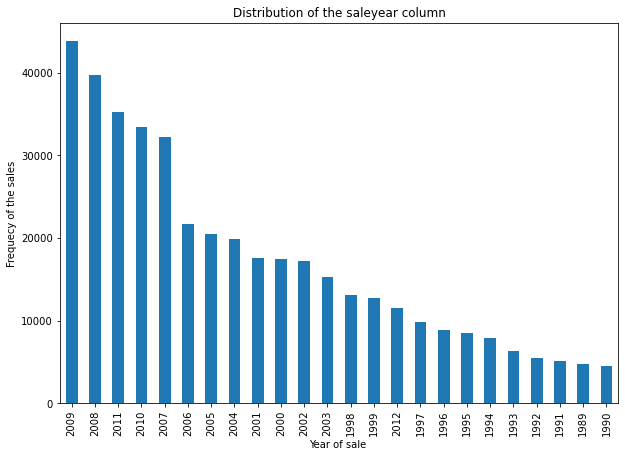

In [226]:
#check the value_counts of the yeas column
df_tmp.saleYear.value_counts().plot(kind="bar",figsize=(10,7))
plt.title("Distribution of the saleyear column")
plt.xlabel("Year of sale ")
plt.ylabel("Frequecy of the sales");

In [227]:
#split our data into training an validation sets 
df_val=df_tmp[df_tmp.saleYear==2012]
df_train=df_tmp[df_tmp.saleYear!=2012]

#check the length of the 2 dataframes 
len(df_val),len(df_train)

(11573, 401125)

####  We have already split our data into both the training and validation sets 

In [228]:
#split the data into X and y(features and the labels)
X_train,y_train=df_train.drop("SalePrice",axis=1),df_train.SalePrice

X_valid,y_valid=df_val.drop("SalePrice",axis=1),df_val.SalePrice

In [229]:
#check the shapes of our newly splitted data

X_train.shape,y_train.shape,y_valid.shape,X_valid.shape

((401125, 102), (401125,), (11573,), (11573, 102))

###  Building an evaluation function


In [230]:
#Create an evaluation function
from sklearn.metrics import mean_squared_log_error,r2_score,mean_absolute_error

def rmsle(y_test,y_preds):
    """
    calculates the mean squared log error between the true values and the predicted values 
    """
    
    return np.sqrt(mean_squared_log_error(y_test,y_preds))

#Create a function to evaluate the model on a few different levels

def show_scores(model):
    """
    The function calculates the results of the model in different metrics/levels
    
    """
    
    train_preds=model.predict(X_train)
    val_preds=model.predict(X_valid)
    
    #return the scores of the dataframe in the form of a dictionary
    scores={"Training MAE":mean_absolute_error(y_train,train_preds),
           "Valid MAE":mean_absolute_error(y_valid,val_preds),
           "Training rmsle":rmsle(y_train,train_preds),
           "Valid rmsle":rmsle(y_valid,val_preds),
           "Training r^2":r2_score(y_train,train_preds),
           "Val_r^2":r2_score(y_valid,val_preds)}
    return scores 

## Testing our model on a subset(To tune the hyperparameters)

In [231]:
#change the max_samples parameter so that we can train on less samples so as to reduce the time between the experiments

#import the randomforest model and instantiate it

from sklearn.ensemble import RandomForestRegressor

model=RandomForestRegressor(n_jobs=-1,
                           random_state=42,
                           max_samples=10000)


In [232]:
#Lets prove the above hypothesis


model.fit(X_train,y_train)

RandomForestRegressor(max_samples=10000, n_jobs=-1, random_state=42)

In [233]:
show_scores(model)

{'Training MAE': 5561.2988092240585,
 'Valid MAE': 7177.26365505919,
 'Training rmsle': 0.257745378256977,
 'Valid rmsle': 0.29362638671089003,
 'Training r^2': 0.8606658995199189,
 'Val_r^2': 0.8320374995090507}

###  Hyperparameter tuning using RandomizedSearchCV

In [234]:
from sklearn.model_selection import RandomizedSearchCV

#Different RandomizedSearchCV hyperparameters 
rf_grid={"n_estimators":np.arange(10,100,10),
        "max_depth":[None,3,5,10],
        "min_samples_split":np.arange(2,20,2),
        "min_samples_leaf":np.arange(1,20,2),
        "max_features":[0.5,1,"sqrt","auto"],
        "max_samples":[10000]}

#instantiate the randomizedSearch cv
rs_model=RandomizedSearchCV(RandomForestRegressor(n_jobs=-1,
                                                 random_state=42),
                           param_distributions=rf_grid,
                           n_iter=2,
                           cv=5,
                           verbose=True)

#refit the randomforestregresssor

rs_model.fit(X_train,y_train)

Fitting 5 folds for each of 2 candidates, totalling 10 fits


RandomizedSearchCV(cv=5,
                   estimator=RandomForestRegressor(n_jobs=-1, random_state=42),
                   n_iter=2,
                   param_distributions={'max_depth': [None, 3, 5, 10],
                                        'max_features': [0.5, 1, 'sqrt',
                                                         'auto'],
                                        'max_samples': [10000],
                                        'min_samples_leaf': array([ 1,  3,  5,  7,  9, 11, 13, 15, 17, 19]),
                                        'min_samples_split': array([ 2,  4,  6,  8, 10, 12, 14, 16, 18]),
                                        'n_estimators': array([10, 20, 30, 40, 50, 60, 70, 80, 90])},
                   verbose=True)

In [235]:
#Find the best model hyperparameters
rs_model.best_params_

{'n_estimators': 80,
 'min_samples_split': 16,
 'min_samples_leaf': 15,
 'max_samples': 10000,
 'max_features': 'sqrt',
 'max_depth': 5}

In [236]:
#Evaluate the randomized searchcv model
show_scores(rs_model)

{'Training MAE': 11777.777883448523,
 'Valid MAE': 13648.824755741685,
 'Training rmsle': 0.5058656936430682,
 'Valid rmsle': 0.5187910218553219,
 'Training r^2': 0.48458291192536096,
 'Val_r^2': 0.48368053354412754}

##  Train a model with the best hyperparameters

In [237]:
#instatiate an ideal model with the best hyperparameters 

ideal_model=RandomForestRegressor(n_estimators=40,
                                 min_samples_leaf=1,
                                 min_samples_split=14,
                                 max_features=0.5,
                                 n_jobs=-1,
                                 max_samples=None)

#fit the ideal model
ideal_model.fit(X_train,y_train)

RandomForestRegressor(max_features=0.5, min_samples_split=14, n_estimators=40,
                      n_jobs=-1)

In [238]:
#Evaluate the ideal model(trained on all the data)
show_scores(ideal_model)

{'Training MAE': 2947.5826561304402,
 'Valid MAE': 5936.089713967829,
 'Training rmsle': 0.14430809642388692,
 'Valid rmsle': 0.24535098122684,
 'Training r^2': 0.9591147569903633,
 'Val_r^2': 0.8821978857534222}

##  Make predictions on the test data 


In [293]:
# import the test data

df_test=pd.read_csv("Test.csv",
                   parse_dates=["saledate"],
                   low_memory=False)

df_test.head()

,SalesID,MachineID,ModelID,datasource,auctioneerID,YearMade,MachineHoursCurrentMeter,UsageBand,saledate,fiModelDesc,...,Undercarriage_Pad_Width,Stick_Length,Thumb,Pattern_Changer,Grouser_Type,Backhoe_Mounting,Blade_Type,Travel_Controls,Differential_Type,Steering_Controls
0,1227829,1006309,3168,121,3,1999,3688.0,Low,2012-05-03,580G,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
1,1227844,1022817,7271,121,3,1000,28555.0,High,2012-05-10,936,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,Standard,Conventional
2,1227847,1031560,22805,121,3,2004,6038.0,Medium,2012-05-10,EC210BLC,...,None or Unspecified,"9' 6""",Manual,None or Unspecified,Double,NaN,NaN,NaN,NaN,NaN
3,1227848,56204,1269,121,3,2006,8940.0,High,2012-05-10,330CL,...,None or Unspecified,None or Unspecified,Manual,Yes,Triple,NaN,NaN,NaN,NaN,NaN
4,1227863,1053887,22312,121,3,2005,2286.0,Low,2012-05-10,650K,...,NaN,NaN,NaN,NaN,NaN,None or Unspecified,PAT,None or Unspecified,NaN,NaN


In [294]:
#make predictions on the test data
test_preds=ideal_model.predict(df_test)

ValueError: could not convert string to float: 'Low'

In [295]:
#inspect the test dataframe
df_test.isna().sum()

SalesID                         0
MachineID                       0
ModelID                         0
datasource                      0
auctioneerID                    0
YearMade                        0
MachineHoursCurrentMeter    10328
UsageBand                   10623
saledate                        0
fiModelDesc                     0
fiBaseModel                     0
fiSecondaryDesc              3975
fiModelSeries               10451
fiModelDescriptor            9433
ProductSize                  6409
fiProductClassDesc              0
state                           0
ProductGroup                    0
ProductGroupDesc                0
Drive_System                 9698
Enclosure                       2
Forks                        6149
Pad_Type                    10349
Ride_Control                 8216
Stick                       10349
Transmission                 7639
Turbocharged                10349
Blade_Extension             11806
Blade_Width                 11806
Enclosure_Type

In [296]:
df_test.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 12457 entries, 0 to 12456
Data columns (total 52 columns):
 #   Column                    Non-Null Count  Dtype         
---  ------                    --------------  -----         
 0   SalesID                   12457 non-null  int64         
 1   MachineID                 12457 non-null  int64         
 2   ModelID                   12457 non-null  int64         
 3   datasource                12457 non-null  int64         
 4   auctioneerID              12457 non-null  int64         
 5   YearMade                  12457 non-null  int64         
 6   MachineHoursCurrentMeter  2129 non-null   float64       
 7   UsageBand                 1834 non-null   object        
 8   saledate                  12457 non-null  datetime64[ns]
 9   fiModelDesc               12457 non-null  object        
 10  fiBaseModel               12457 non-null  object        
 11  fiSecondaryDesc           8482 non-null   object        
 12  fiModelSeries     

In [297]:
df.columns

Index(['SalesID', 'SalePrice', 'MachineID', 'ModelID', 'datasource',
       'auctioneerID', 'YearMade', 'MachineHoursCurrentMeter', 'UsageBand',
       'saledate', 'fiModelDesc', 'fiBaseModel', 'fiSecondaryDesc',
       'fiModelSeries', 'fiModelDescriptor', 'ProductSize',
       'fiProductClassDesc', 'state', 'ProductGroup', 'ProductGroupDesc',
       'Drive_System', 'Enclosure', 'Forks', 'Pad_Type', 'Ride_Control',
       'Stick', 'Transmission', 'Turbocharged', 'Blade_Extension',
       'Blade_Width', 'Enclosure_Type', 'Engine_Horsepower', 'Hydraulics',
       'Pushblock', 'Ripper', 'Scarifier', 'Tip_Control', 'Tire_Size',
       'Coupler', 'Coupler_System', 'Grouser_Tracks', 'Hydraulics_Flow',
       'Track_Type', 'Undercarriage_Pad_Width', 'Stick_Length', 'Thumb',
       'Pattern_Changer', 'Grouser_Type', 'Backhoe_Mounting', 'Blade_Type',
       'Travel_Controls', 'Differential_Type', 'Steering_Controls'],
      dtype='object')

##  Preprocessing the test_dataset(Getting the test dataset in the same format as the data our model was trained on)

In [298]:
# ## Preprocessing the data..Converting the data into the same format as the training dataset
# def preprocess_data(df):
#     """
#     perfoms transformations on df and returns the transformed df.
#     """
#     df["saleYear"]=df.saledate.dt.year
#     df["salemonth"]=df.saledate.dt.month
#     df["saleDay"]=df.saledate.dt.day
#     df["dayOfWeek"]=df.saledate.dt.dayofweek
#     df["dayofYear"]=df.saledate.dt.dayofyear
    
#     df.drop("saledate",axis=1,inplace=True)
    
#     #Fill the numerical columns with median
#     for label,content in df.items():
#         if pd.api.types.is_numeric_dtype(content):
#             if pd.isnull(content).sum():
#             ## add a binary column which tells us whether our data was missing or not
#                 df[label+"_is _missing"]=pd.isnull(content)
#             ## fill numeric missing values with the median
#                 df[label]=content.fillna(content.median())
    
#     #fill the categorical missing data and turn the categories into numbers since pandas encodes missing categories as -1
#         if not pd.api.types.is_numeric_dtype(content):
#             df[label +"_is_missing"]=pd.isnull(content)
#             df[label]=pd.Categorical(content).codes+1
    
#     return df


In [299]:
#preprocessing the data(processing the test dataset o be in the same format as the data our model was trained with)

def preprocess_data(df):
    """
    The functiin takes in a dataset and preprocesses it  conerting it to be in the same 
    format as the data  the model was trained with
    """
    df["saleYear"]=df.saledate.dt.year
    df["saleMonth"]=df.saledate.dt.month
    df["saleDay"]=df.saledate.dt.day
    df["saleDayOfWeek"]=df.saledate.dt.dayofweek
    df["saleDayOfYear"]=df.saledate.dt.dayofyear
    
    #drop the saledate column as we have already enriched the dataframe using the column
    df.drop("saledate",axis=1,inplace=True)
    
    #fill in the missing numeric values with the median
    for label,content in df.items():
        if pd.api.types.is_numeric_dtype(content):
            if pd.isnull(content).sum():
                #Add a binary column which tells us whether or not the column had missing values before
                df[label+"_is_missing"]=pd.isnull(content)
                #fill in the missing numeric values with the median
                df[label]=content.fillna(content.median())
                
        #fill in the missing categorical values and turn the categories into numbers 
        if not pd.api.types.is_numeric_dtype(content):
            #Add a binary column which tells us whether the column had missing values or not
            df[label+"_is_missing"]=pd.isnull(content)
            #turn the categories into numbers and add +1 since pandas enocodes missing categorical values as -1
            df[label]=pd.Categorical(content).codes+1
            
    return df
                
                
                
                
    

In [300]:
#preprocess thre test data
df_test=preprocess_data(df_test)
df_test.head()

,SalesID,MachineID,ModelID,datasource,auctioneerID,YearMade,MachineHoursCurrentMeter,UsageBand,fiModelDesc,fiBaseModel,...,Undercarriage_Pad_Width_is_missing,Stick_Length_is_missing,Thumb_is_missing,Pattern_Changer_is_missing,Grouser_Type_is_missing,Backhoe_Mounting_is_missing,Blade_Type_is_missing,Travel_Controls_is_missing,Differential_Type_is_missing,Steering_Controls_is_missing
0,1227829,1006309,3168,121,3,1999,3688.0,2,499,180,...,True,True,True,True,True,True,True,True,True,True
1,1227844,1022817,7271,121,3,1000,28555.0,1,831,292,...,True,True,True,True,True,True,True,True,False,False
2,1227847,1031560,22805,121,3,2004,6038.0,3,1177,404,...,False,False,False,False,False,True,True,True,True,True
3,1227848,56204,1269,121,3,2006,8940.0,1,287,113,...,False,False,False,False,False,True,True,True,True,True
4,1227863,1053887,22312,121,3,2005,2286.0,2,566,196,...,True,True,True,True,True,False,False,False,True,True


In [292]:
#check the shape of the X_train data
X_train.shape

(401125, 102)

In [288]:
#make predictions with the test dataset
test_preds=ideal_model.predict(df_test)
test_preds

ValueError: X has 101 features, but DecisionTreeRegressor is expecting 102 features as input.

In [301]:
#We can find how the columns differ using the python sets 

set(X_train.columns)-set(df_test.columns)

{'auctioneerID_is_missing'}

In [302]:
#manually adjust the auctioneerid column in the df_test
df_test["auctioneerID_is_missing"]=False
df_test.head()

,SalesID,MachineID,ModelID,datasource,auctioneerID,YearMade,MachineHoursCurrentMeter,UsageBand,fiModelDesc,fiBaseModel,...,Stick_Length_is_missing,Thumb_is_missing,Pattern_Changer_is_missing,Grouser_Type_is_missing,Backhoe_Mounting_is_missing,Blade_Type_is_missing,Travel_Controls_is_missing,Differential_Type_is_missing,Steering_Controls_is_missing,auctioneerID_is_missing
0,1227829,1006309,3168,121,3,1999,3688.0,2,499,180,...,True,True,True,True,True,True,True,True,True,False
1,1227844,1022817,7271,121,3,1000,28555.0,1,831,292,...,True,True,True,True,True,True,True,False,False,False
2,1227847,1031560,22805,121,3,2004,6038.0,3,1177,404,...,False,False,False,False,True,True,True,True,True,False
3,1227848,56204,1269,121,3,2006,8940.0,1,287,113,...,False,False,False,False,True,True,True,True,True,False
4,1227863,1053887,22312,121,3,2005,2286.0,2,566,196,...,True,True,True,True,False,False,False,True,True,False


Finally our test data has the same features as our training data,we can now make predictions on the test data

In [303]:
#make predictions on the test data
test_preds=ideal_model.predict(df_test)
test_preds

array([19995.75128832, 22496.46582476, 49355.63495955, ...,
       14390.55526701, 16110.91633203, 28065.86658645])

### Format the predictions to be  in the same format kaggle is loooking for

In [304]:
#Create an empty dataframe
df_preds=pd.DataFrame()
df_preds["SalesID"]=df_test["SalesID"]
df_preds["SalesPrice"]=test_preds



In [305]:
#Have a look at the dataframe
df_preds

,SalesID,SalesPrice
0,1227829,19995.751288
1,1227844,22496.465825
2,1227847,49355.634960
3,1227848,66290.582381
4,1227863,56392.841722
...,...,...
12452,6643171,39106.278487
12453,6643173,13776.420349
12454,6643184,14390.555267
12455,6643186,16110.916332


In [306]:
df_preds.shape

(12457, 2)

###  Feature importance

feature importance seeks to figure out which of the attributes of the data were most important when it comes to predicting the 
**target_variable**(Saleprice)

In [307]:
#find the feature importances of our ideal model
ideal_model.feature_importances_

array([3.48072639e-02, 1.86238449e-02, 3.94000665e-02, 1.85828962e-03,
       3.33815947e-03, 2.08432810e-01, 3.25894714e-03, 9.76934522e-04,
       3.98469580e-02, 4.70710027e-02, 6.29486680e-02, 4.84059124e-03,
       1.82614073e-02, 1.73313736e-01, 4.94147876e-02, 6.03881259e-03,
       1.30339313e-03, 2.55964582e-03, 3.38652513e-03, 5.80199823e-02,
       4.97410583e-04, 3.12740388e-04, 7.87372502e-04, 1.46081454e-04,
       1.34535162e-03, 2.34719247e-05, 2.09916107e-03, 8.14347581e-03,
       3.13458442e-03, 2.05782258e-03, 1.80197579e-03, 2.40882666e-03,
       5.12013815e-03, 1.04949999e-03, 4.84390524e-04, 5.86492973e-03,
       7.75742714e-04, 1.03592757e-02, 3.07323676e-03, 2.38825427e-03,
       1.13496745e-03, 8.81091130e-04, 3.38306859e-03, 5.68897541e-04,
       5.74975057e-04, 3.49708634e-04, 3.30679493e-04, 1.51473804e-03,
       7.97837960e-04, 2.79315922e-04, 2.73485622e-04, 7.26695989e-02,
       3.77618311e-03, 5.64344325e-03, 2.89721012e-03, 9.88450841e-03,
      

In [308]:
#check the length of the feature impotances attribute
len(ideal_model.feature_importances_)

102

In [315]:
#Create a helper functions for plotting the feature imortances 

def plot_features(columns,importances,n=20):
    df=(pd.DataFrame({"features":columns,
                     "feature_importances":importances})
       .sort_values("feature_importances",ascending=False)
       .reset_index(drop=True))
    
    #plot the dataframe
    fig,ax=plt.subplots()
    ax.barh(df["features"][:n],df["feature_importances"][:n])
    plt.ylabel("Features")
    plt.xlabel("Feature importances")
    ax.invert_yaxis();

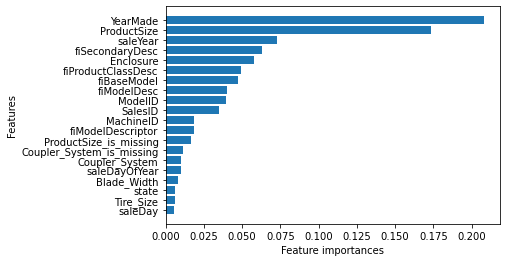

In [316]:
#plot the dataframe

plot_features(columns=X_train.columns,importances=ideal_model.feature_importances_)